<h1>Overall Notebook Title</h1>

<p>Notebook information goes here. You know, why I'm making it and things like that.</p>

<h2>Basic Imports</h2>
<p>For now, the only libraries we'll need are NetworkX to create our graphs, and MatPlotLib to actually display those graphs.</p>

In [5]:
import networkx as nx
import pygraphviz as pgv
import pylab as plt
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib.lines import Line2D

<h2>Graph Creation</h2>

<p>Creating a graph for each different category of node within the network. We'll initialize them now, then populate them generously below with lists for each before actually creating connections based on evidence and circumstantial background information.</p>

In [6]:
G = nx.Graph()

In [4]:
people_list = [
    'Alexander Perepilichnyy',
    'Bill Browder',
    'Andrey Pavlov',
    'Dimitry Klyuev',
    'Sergei Magnitsky',
    'Vladimir Putin',
    'Natalia Veselnitskaya',
    'Donald Trump Jr.',
    'Mikhail Khodorkovsky',
    'Vladlen Stepanov',
    'Olga Stepanova',
    'Lord Peter Goldsmith',
    'Olena Tyshchenko',
    'Mukhtar Ablyazov',
    'Artema Kuznetsov',
    'Lynton Crosby',
    'Donald Trump',
    'Ty Cobb',
    'Vladimir Lenin',
    'Anatoly Sobchak',
    'Viktor Yushchenko',
    'Alexander Litvinenko'
]

companies_list = [
    'Hermitage Capital',
    'Hogan Lovells',
    'Akin Gump',
    'Debovoise & Plimpton',
    'BTA Bank',
    'Danske Bank',
    'FTI Consulting',
    'CTF Partners',
    'Curare Poison',
    'Gelsemium Poison'
]

agencies_list = [
    'Russian Interior Ministry',
    'Tax Office No. 25',
]

major_locations_list = [
    'Larnaca, Cyprus',
    'French Countryside',
    'London, England',
    'Paris, France',
    'Trump Tower NYC',
    'Kamera'
]

events_list = [
    'Tax Fraud',
    'Browder Office Raid',
    'Magnitsky Torture, Death',
    'Magnitsky Act Passed',
    'Pavlov Email Leak',
]

In [359]:
G.add_nodes_from([(person, dict(kind='person')) for person in people_list])
G.add_nodes_from([(company, dict(kind='company')) for company in companies_list])
G.add_nodes_from([(agency, dict(kind='agency')) for agency in agencies_list])
G.add_nodes_from([(location, dict(kind='location')) for location in major_locations_list])
G.add_nodes_from([(event, dict(kind='event')) for event in events_list])

# Example Indexing:
print G.nodes()['BTA Bank']['kind']

company


In [360]:
def make_colors(G):
    
    node_color = []
    for node in G.nodes():
        if G.nodes()[node]['kind'] == 'person':
            node_color.append('royalblue')
        elif G.nodes()[node]['kind'] == 'company':
            node_color.append('orange')
        elif G.nodes()[node]['kind'] == 'agency':
            node_color.append('turquoise')
        elif G.nodes()[node]['kind'] == 'location':
            node_color.append('salmon')
        elif G.nodes()[node]['kind'] == 'event':
            node_color.append('yellowgreen')
            
    return node_color

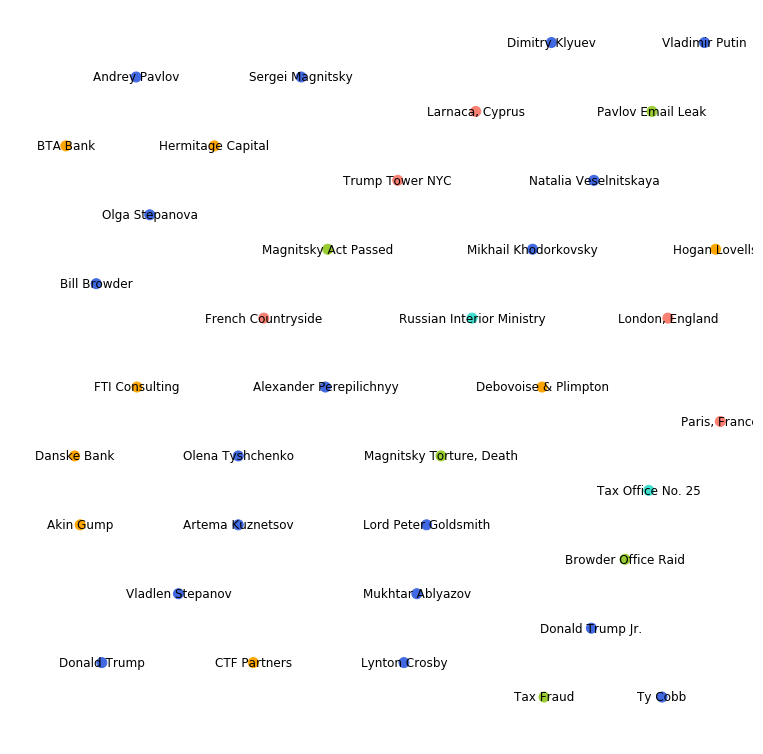

In [361]:
colors = make_colors(G)
fig = plt.figure(figsize=(10,10))

nx.draw(
    G,
    pos=graphviz_layout(G, prog='neato'),
    node_size=100,
    with_labels=True,
    font_size=12,
    node_color=colors,
)

plt.show()

<h2>Edge Creation</h2>

<p>The most important part of this network now, we'll examine connections between each of the main players within this network as well as the organizations representing them.</p>

In [369]:
def show_graph(colors):
    #fig = plt.figure(figsize=(10,10))
    fig,ax = plt.subplots(figsize=(20,20))
    
    nx.draw(
        G,
        pos=graphviz_layout(G, prog='neato'),
        with_labels=True,
        font_size=12,
        font_color='snow',
        node_color=colors,
        edge_color='lightgray',
        node_size=[(nx.degree(G)[s]+1)*500 for s in G.nodes()],
    )
    
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Person', markerfacecolor='royalblue', markersize=30),
        Line2D([0], [0], marker='o', color='w', label='Company', markerfacecolor='orange', markersize=30),
        Line2D([0], [0], marker='o', color='w', label='Agency', markerfacecolor='turquoise', markersize=30),
        Line2D([0], [0], marker='o', color='w', label='Location', markerfacecolor='salmon', markersize=30),
        Line2D([0], [0], marker='o', color='w', label='Event', markerfacecolor='yellowgreen', markersize=30),]

    ax.legend(handles=legend_elements, fontsize=24, loc='lower right')
    fig.set_facecolor("#00000F")
    
    plt.figtext(
        0.5, 
        0.80, 
        'Alexander Perepilichnyy | Sergei Magnitsky Death Networks', 
        fontsize=36, 
        color='lightgray', 
        ha ='center'
    )

    plt.show()
    plt.show()

In [370]:
# Putin, Browder Relationship
G.add_edge('Vladimir Putin', 'Bill Browder', label='Partners to remove oligarchy')
G.add_edge('Vladimir Putin', 'Bill Browder', label='Frustration after oligarchy removal')

G.add_edge('Bill Browder', 'Hermitage Capital', label='Owner')
G.add_edge('Hermitage Capital', 'Tax Fraud', label='Target Company')
G.add_edge('Russian Interior Ministry', 'Hermitage Capital', label='Raided the company for documents')
G.add_edge('Tax Fraud', 'Tax Office No. 25', label='Location of Tax Refund Payout')
G.add_edge('Olga Stepanova', 'Tax Office No. 25', label='Employee during tax refunds')
G.add_edge('Andrey Pavlov', 'Tax Office No. 25', label='Lawyer suing Hermitage Capital stolen companies for damages')
G.add_edge('Andrey Pavlov', 'Tax Fraud', label='Lawyer suing Hermitage Capital stolen companies for damages')
G.add_edge('Bill Browder', 'Russian Interior Ministry', label='Investigate Browder for Tax Fraud')
G.add_edge('Browder Office Raid', 'Russian Interior Ministry', label='Conducted the raid')
G.add_edge('Bill Browder', 'Browder Office Raid', label='His office for Hermitage Capital')
G.add_edge('Browder Office Raid', 'Hermitage Capital', label='Company that was raided to seize assets by RIM')
G.add_edge('Browder Office Raid', 'Larnaca, Cyprus', label='Decided as part of Klyuev syndicate meeting')

G.add_edge('Bill Browder', 'Sergei Magnitsky', label='Hired to investigate tax fraud')
G.add_edge('Sergei Magnitsky', 'Russian Interior Ministry', label='Testifies against RIM during fraud case')
G.add_edge('Sergei Magnitsky', 'Russian Interior Ministry', label='Arrested and sent to prison where he died')
G.add_edge('Artema Kuznetsov', 'Russian Interior Ministry', label='Lt. Col of RIM, placed in charge of tax fraud')
G.add_edge('Sergei Magnitsky', 'Andrey Pavlov', label='Visited while in prison')
G.add_edge('Sergei Magnitsky', 'Artema Kuznetsov', label='Testifies specifically against him in case')
G.add_edge('Sergei Magnitsky', 'Dimitry Klyuev', label='Testified specifically against Klyuev')
G.add_edge('Magnitsky Torture, Death', 'Andrey Pavlov', label='Visited while in prison')

G.add_edge('Bill Browder', 'Magnitsky Act Passed', label='Lobbied heavily for this')
G.add_edge('Natalia Veselnitskaya', 'Donald Trump Jr.', label='Met in Trump Tower to discuss Magnitsky Act repeal')
G.add_edge('Natalia Veselnitskaya', 'Trump Tower NYC', label='Met with DTJ here')
G.add_edge('Natalia Veselnitskaya', 'Andrey Pavlov', label='Facebook friends, relationship subpoenaed')
G.add_edge('Donald Trump Jr.', 'Trump Tower NYC', label='Met with Veselnitskaya here')
G.add_edge('Magnitsky Act Passed', 'Andrey Pavlov', label='Lobbies internationally against sanctions')
G.add_edge('Magnitsky Act Passed', 'Natalia Veselnitskaya', label='Discussed this with DTJ at Trump Tower')
G.add_edge('Magnitsky Act Passed', 'Donald Trump Jr.', label='Discussed this with Veselnitskaya at Trump Tower')
G.add_edge('Magnitsky Act Passed', 'Trump Tower NYC', label='Location of meeting regarding the act with DTJ')

In [371]:
# Cyprus Connections
G.add_edge('Larnaca, Cyprus', 'Andrey Pavlov', label='Attended')
G.add_edge('Larnaca, Cyprus', 'Dimitry Klyuev', label='Attended')
G.add_edge('Larnaca, Cyprus', 'Vladlen Stepanov', label='Attended')
G.add_edge('Larnaca, Cyprus', 'Olga Stepanova', label='Attended')
G.add_edge('Larnaca, Cyprus', 'Alexander Perepilichnyy', label='Likely Attended')
G.add_edge('Larnaca, Cyprus', 'Tax Fraud', label='Planning Location')

In [372]:
# Perepilichnyy Connections
G.add_edge('Olga Stepanova','Vladlen Stepanov',label='married')
G.add_edge('Alexander Perepilichnyy', 'Vladlen Stepanov',label='Accountant, lost favor by stealing money in 08')
G.add_edge('Alexander Perepilichnyy', 'Olga Stepanova',label='Accountant, lost favor by stealing money in 08')

G.add_edge('Alexander Perepilichnyy', 'Tax Fraud', label='Blew Whistle, Planned')
G.add_edge('Alexander Perepilichnyy', 'London, England', label='Hideout after Whistleblowing')
G.add_edge('Alexander Perepilichnyy', 'London, England', label='Location of Death')

G.add_edge('Alexander Perepilichnyy', 'Paris, France', label='Visited before death')
G.add_edge('Andrey Pavlov', 'Paris, France', label='Visited before Perepilichnyy death')
G.add_edge('Alexander Perepilichnyy', 'Andrey Pavlov', label='Likely Met in Paris, claims that Pavlov is member of RIM. Pavlov can help ameliorate with Stepanovs.')
G.add_edge('Andrey Pavlov', 'Russian Interior Ministry', label='Perepilichnyy claims that Palov works for RIM')

G.add_edge('Alexander Perepilichnyy', 'Bill Browder', label='Blew the whistle on Tax Fraud to Browder')
G.add_edge('Bill Browder', 'Olga Stepanova', label='Releases videos indicting the couple after whistleblowing')
G.add_edge('Bill Browder', 'Vladlen Stepanov', label='Releases videos indicting the couple after whistleblowing')

In [373]:
# Pavlov Email Leak
G.add_edge('Andrey Pavlov', 'Pavlov Email Leak', label='Self-evident')
G.add_edge('Andrey Pavlov', 'Akin Gump', label='Contacts firm for assistance')
G.add_edge('Andrey Pavlov', 'FTI Consulting', label='Emails them asking for assistance')
G.add_edge('Akin Gump', 'FTI Consulting', label='Akin recommends FTI to Pavlov to go against NY prosecutor report')

# Fighting Sanctions
G.add_edge('Andrey Pavlov', 'Debovoise & Plimpton', label='Tries to hire them after FTI')
G.add_edge('Lord Peter Goldsmith', 'Debovoise & Plimpton', label='Employee at the firm, former UK attorney general')
G.add_edge('Lord Peter Goldsmith', 'Andrey Pavlov', label='Acts for Pavlov to reverse prosecutor decision')
G.add_edge('Andrey Pavlov', 'Lynton Crosby', label='Contacts him for help with lobbying')
G.add_edge('Lynton Crosby', 'CTF Partners', label='PR firm that Crosby is working for')
G.add_edge('Andrey Pavlov', 'CTF Partners', label='Claimed they did not lobby for Pavlov')

In [374]:
# Kazakh government scandal (Pavlov working for RIM)
G.add_edge('Olena Tyshchenko', 'Hogan Lovells', label='Sends email incriminating HL and BTA Bank')
G.add_edge('Olena Tyshchenko', 'BTA Bank', label='Indicts them in email to Hogan Lovells')
G.add_edge('Olena Tyshchenko', 'Russian Interior Ministry', label='Arrested. Given false evidence and told to present it.')
G.add_edge('Hogan Lovells', 'Russian Interior Ministry', label='Wrote the agreement that Tyshchenko was forced to sign')
G.add_edge('Hogan Lovells', 'Andrey Pavlov', label='Forwarded Tyshchenkos email to him')
G.add_edge('Olena Tyshchenko', 'Andrey Pavlov', label='Present in Russian jail Olena was interrogated in')
G.add_edge('Mukhtar Ablyazov', 'BTA Bank', label='Accused in 2009 of fraud against them.')
G.add_edge('Mukhtar Ablyazov', 'London, England', label='Sought asylum here after BTA nationalized and he accused of fraud')
G.add_edge('Mukhtar Ablyazov', 'French Countryside', label='Flees London to here in 2012 after being held in concempt of court')
G.add_edge('Olena Tyshchenko', 'Mukhtar Ablyazov', label='Visits him and provides legal advice')
G.add_edge('French Countryside', 'Olena Tyshchenko', label='Visits Ablyazov here')
G.add_edge('Hogan Lovells', 'French Countryside', label='Sends private investigators to view the meeting')
G.add_edge('Hogan Lovells', 'Mukhtar Ablyazov', label='Clearly interested in him if they sent PIs for this meeting.')
G.add_edge('Olena Tyshchenko', 'Russian Interior Ministry', label='Arrested and forced to give false evidence against Ablyazov')

G.add_edge('Hogan Lovells', 'Donald Trump', label='Hires Ty Cobb from here')
G.add_edge('Ty Cobb', 'Donald Trump', label='Trumps Lawyer')

In [ ]:
# Poison Connections
G.add_edge('Vladimir Lenin', 'Curare', label='Poisoned with bullet coated in curare')
G.add_edge('Vladimir Lenin', 'Kamera', label='Starts Kamera after his poisoning with curare')
G.add_edge('Kamera', 'Curare', label='Produces and frequently uses curare poison')

G.add_edge('Anatoly Sobchak', 'Kamera', label='Russian politician poisoned in 2000 by Kamera')
G.add_edge('Viktor Yushchenko', 'Kamera', label='Poisoned and killed by Kamera')
G.add_edge('Alexander Litvinenko', 'Kamera', label='Poisoned and killed by Kamera')
G.add_edge('Alexander Litvinenko', 'Vladimir Putin', label='Calls out Putin for poisoning him on his death bed')

G.add_edge('Alexander Litvinenko', 'Alexander Perepilichnyy', label='Company owned by suspect of Litvinenko killing tries to sue Perepilichnyy')

G.add_edge('Gelsemium Poison', 'Curare Poison', label='Gelsemium is a new type of poison used by Kamera')
G.add_edge('Gelsemium Poison', 'Alexander Perepilichnyy', label='Poison found in Perepilichnyy bloodstream')


In [ ]:
# VRB Connections

In [ ]:
# Deripaska Connections

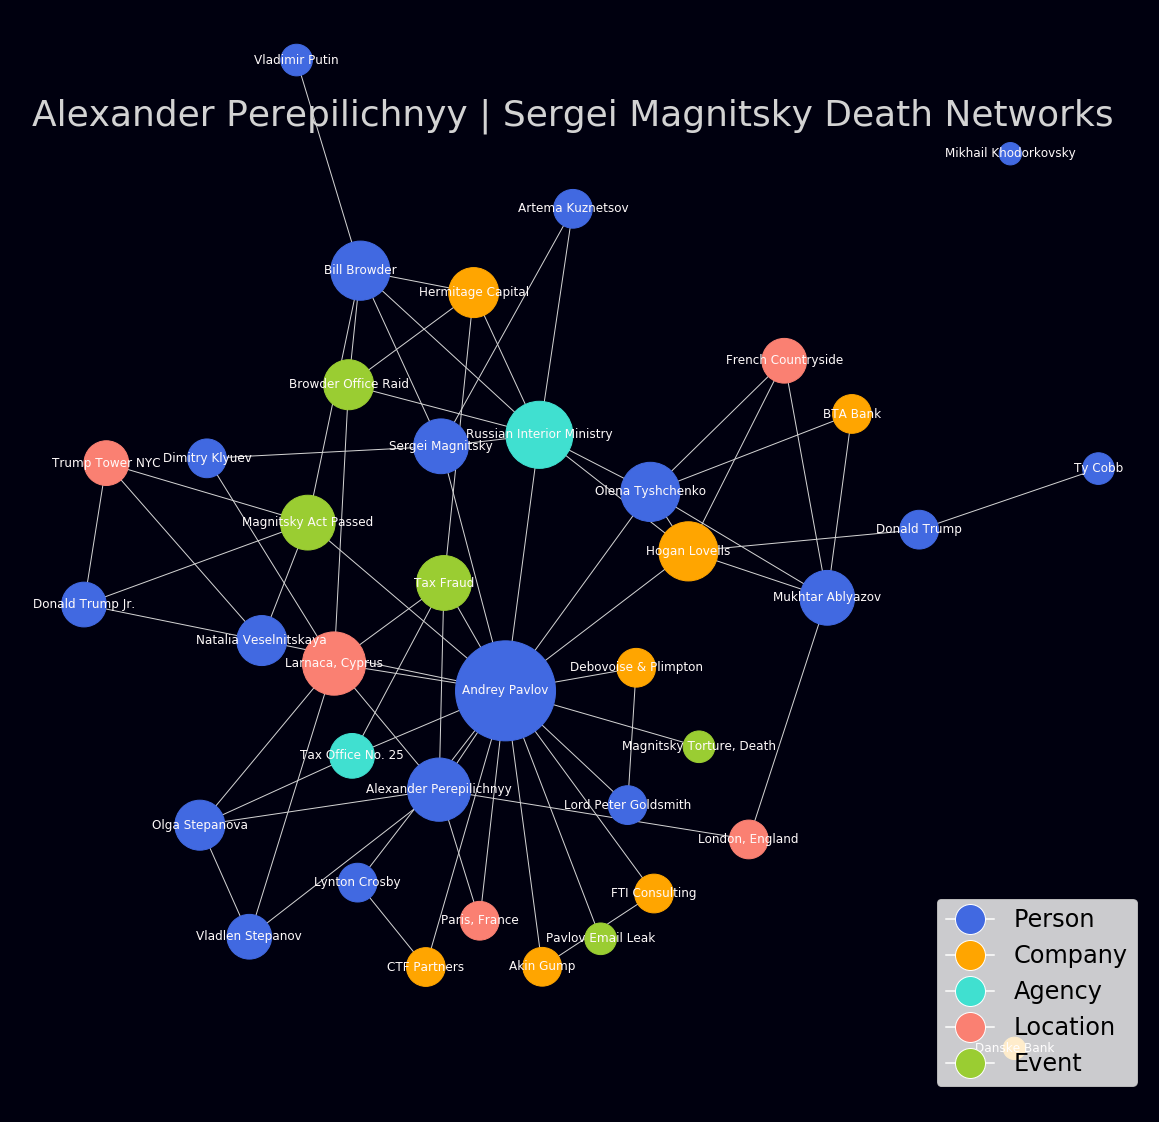

In [375]:
colors = make_colors(G)
show_graph(colors)